# PROJECT : FOOD OUTLETS SALES PREDICTION USING MACHINE LEARNING

# PART 2 : MODEL BUILDING

## NOTE : Part 1 of the project (Data Processing and Exploratory Data Analysis (EDA)) is performed in 'Outlets Sales Prediction (EDA).ipynb' file.

# Importing the Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor
from sklearn.pipeline import Pipeline
import pickle

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('After_EDA.csv')
df.head(3)

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Sales
0,0,FDA15,3.1,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3824.0
1,1,DRC01,0.6,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,293.0
2,2,FDN15,2.1,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,1590.0


# Data Preparation For Model Building

In [3]:
# Dropping the non required features
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# Ordinal Encoding of categorical features based on the target variable

for i in df.columns:
    if df[i].dtype == 'object':
        categories = df.groupby(i)['Outlet_Sales'].sum().sort_values(ascending=False).index.to_list()
        order = [x for x in range(len(categories),0,-1)]
        df.replace(categories,order,inplace=True) 

### Here, we've used a 'Target guided ordinal encoding' method to encode the categorical features based on the target variable, that is, Outlet Sales. For example, a category having higher value of sales will be given a higher order or integer in the encoding, whereas a category having lower value of sales has been given a lower order.

In [5]:
# Encoded dataset
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Sales
0,1508,3.1,2,0.016047,12,249.8092,6,1999,3,1,4,3824.0
1,121,0.6,1,0.019278,7,48.2692,7,2009,3,3,1,293.0
2,902,2.1,2,0.016760,8,141.6180,6,1999,3,1,4,1590.0
3,1205,0.9,1,0.000000,15,182.0950,2,1998,3,3,3,2126.0
4,185,1.2,2,0.000000,14,53.8614,8,1987,1,3,4,509.0


In [6]:
# Splitting the data into training and testing sets

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 50)

# Model 1 : Linear Regression

In [7]:
# Creating an Object of StandardScaler and Linear Regression class for building the Pipeline.
lr1 = StandardScaler()

lr2 = LinearRegression()

In [8]:
# Pipeline for Linear Regression Model

lrpipe = Pipeline([
    ('lr1',lr1),
    ('lr2',lr2),
])

In [9]:
# Model training and evaluation using R2_score and Mean Squared Error.

lrpipe.fit(x_train,y_train)

lr_pred = lrpipe.predict(x_test)

print('R2 score', round(r2_score(y_test,lr_pred)*100,2),'%','\n')

print('Mean Squared Error', round(mean_squared_error(y_test,lr_pred),2))

R2 score 80.79 % 

Mean Squared Error 197642.77


<Axes: >

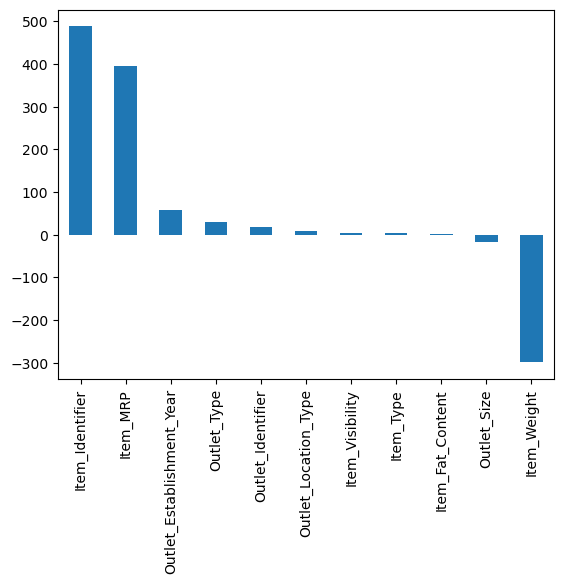

In [10]:
# Linear regression feature importance
features = pd.Series(lr2.coef_,x.columns).sort_values(ascending=False)
features.plot(kind='bar')

# Model 2 : Ridge Regression

In [11]:
# Creating an Object of StandardScaler and Ridge Regression class.
ridge1 = StandardScaler()

ridge2 = Ridge(alpha=5)

In [12]:
# Pipeline for Ridge Regression Model

ridgepipe = Pipeline([
    ('ridge1',ridge1),
    ('ridge2',ridge2),
])

In [13]:
# Model training and evaluation using R2_score and Mean Squared Error

ridgepipe.fit(x_train,y_train)

ridge_pred = ridgepipe.predict(x_test)

print('R2 score', round(r2_score(y_test,ridge_pred)*100,2),'%','\n')

print('Mean Squared Error', round(mean_squared_error(y_test,ridge_pred),2))

R2 score 80.79 % 

Mean Squared Error 197638.31


# Model 3 : Decision Tree Regressor

In [21]:
# Hyperparameter tuning for Decisiontree Regressor -- Identifying the best parameters for maximum R2 score

dt1 = StandardScaler()

dt2 = DecisionTreeRegressor()

dt_param = {
    'max_depth':[10,20,30,40,50],
    'min_samples_leaf':[1,2,3]
}

grid = RandomizedSearchCV(estimator = dt2, param_distributions = dt_param, n_jobs = 10,
                          cv = None, scoring = 'accuracy', error_score = 0, n_iter = 10,
                         random_state = 50)

grid_result = grid.fit(x_train,y_train)

final = dt2.set_params(**grid_result.best_params_)
final



DecisionTreeRegressor(max_depth=50)

In [15]:
# Training and evaluating Decisiontree Model using the best parameters identified by RandomizedsearchCV

dt_pipe = Pipeline([
    ('dt1',dt1),
    ('final',final)
])

dt_pipe.fit(x_train,y_train)

dt_pred = dt_pipe.predict(x_test)

print('R2 score', round(r2_score(y_test,dt_pred)*100,2),'%','\n')

R2 score 96.99 % 



In [19]:
print('Mean Squared Error', round(mean_squared_error(y_test,dt_pred),2))

Mean Squared Error 31011.4


<Axes: >

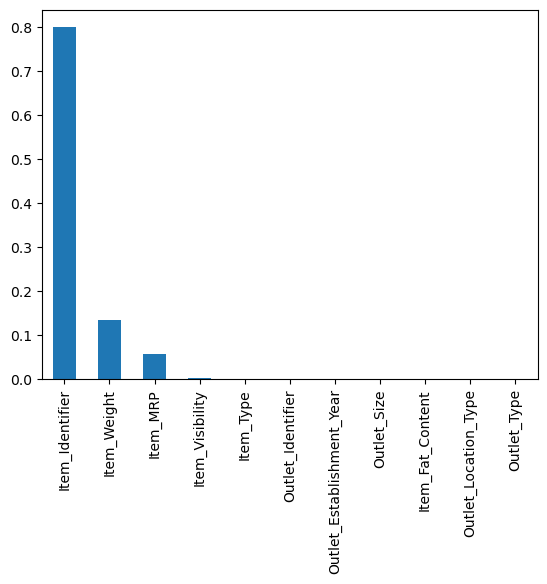

In [16]:
# Feature Importance of Decisiontree Regressor

features = pd.Series(dt2.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind='bar')

# Model 4 : Random Forest Regressor

In [17]:
# Hyperparameter tuning for Randomforest Regressor -- Identifying the best parameters for maximum R2_Score

rf1 = StandardScaler()

rf2 = RandomForestRegressor()

rf_param = {
    'n_estimators': [40],
    'max_features':[0.2,0.5,0.7],
    'max_depth':[10,20,30,40]}


grid_rf = RandomizedSearchCV(estimator = rf2, param_distributions = rf_param, n_jobs = 10,
                             cv = None, scoring = 'accuracy', error_score = 0, n_iter = 10,
                         random_state = 10)


grid_result_rf = grid_rf.fit(x_train,y_train)

final_rf = rf2.set_params(**grid_result_rf.best_params_)
final_rf


RandomForestRegressor(max_depth=10, max_features=0.7, n_estimators=40)

In [18]:
# Training and evaluating Randomforest Model using the best parameters identified by RandomizedsearchCV

rf_pipe = Pipeline([
    ('rf1',rf1),
    ('final_rf',final_rf)
])

rf_pipe.fit(x_train,y_train)

rf_pred = rf_pipe.predict(x_test)

print('R2 score', round(r2_score(y_test,rf_pred)*100,2),'%','\n')

R2 score 98.37 % 



In [20]:
print('Mean Squared Error', round(mean_squared_error(y_test,rf_pred),2))

Mean Squared Error 16735.8


<Axes: >

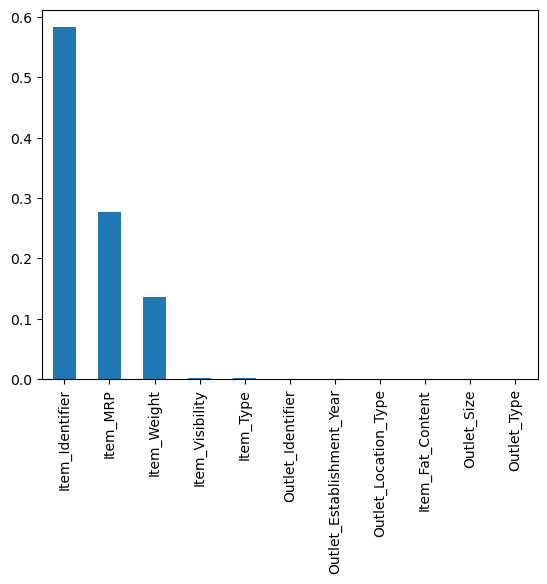

In [22]:
# Feature Importance of Randomforest Regressor

features = pd.Series(rf2.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind='bar')

# Model 5 : Extra Tree Regressor

In [23]:
# Creating an Object of StandardScaler and Extra Tree Regressor class

et1 = StandardScaler()

et2 = ExtraTreesRegressor(n_estimators = 50, criterion = 'squared_error', max_depth = 15,random_state = 50)

In [24]:
# Pipeline for Extra Tree Regressor Model

etpipe = Pipeline([
    ('et1',et1),
    ('et2',et2),
])

In [25]:
# Training and Evaluating the model.

etpipe.fit(x_train,y_train)

et_pred = etpipe.predict(x_test)

print('R2 score', round(r2_score(y_test,et_pred)*100,2),'%','\n')

print('Mean Squared Error', round(mean_squared_error(y_test,et_pred),2))

R2 score 98.17 % 

Mean Squared Error 18838.13


# Model 6 : Gradient Boosting Regressor

In [26]:
gb1 = StandardScaler()

gb2 = GradientBoostingRegressor(n_estimators=100,learning_rate=1,random_state=50)

In [27]:
# Pipeline for Gradient Boosting Model

gbpipe = Pipeline([
    ('gb1',gb1),
    ('gb2',gb2),
])

In [28]:
# Training and Evaluating the model.

gbpipe.fit(x_train,y_train)

gb_pred = gbpipe.predict(x_test)

print('R2 score', round(r2_score(y_test,gb_pred)*100,2),'%','\n')

print('Mean Squared Error', round(mean_squared_error(y_test,gb_pred),2))

R2 score 97.88 % 

Mean Squared Error 21851.11


# Model 7 : XGBoost Regressor

In [29]:
xg1 = StandardScaler()
xg2 = XGBRFRegressor(n_estimators = 100,learning_rate=1,random_state=42)

In [30]:
# Building Pipeline for XGBoost Model

xgpipe = Pipeline([
    ('xg1',xg1),
    ('xg2',xg2),
])

In [31]:
# Training and Evaluating the model.

xgpipe.fit(x_train,y_train)

xg_pred = xgpipe.predict(x_test)

print('R2 score', round(r2_score(y_test,xg_pred)*100,2),'%','\n')

print('Mean Squared Error', round(mean_squared_error(y_test,xg_pred),2))

R2 score 97.85 % 

Mean Squared Error 22138.47


# Model 8 : AdaBoost Regressor

In [32]:
ab1 = StandardScaler()
ab2 = AdaBoostRegressor(n_estimators=150,learning_rate=0.2)

In [33]:
# Building Pipeline for AdaBoost Model

abpipe = Pipeline([
    ('ab1',ab1),
    ('ab2',ab2),
])

In [34]:
# Training and Evaluating the model.

abpipe.fit(x_train,y_train)

ab_pred = abpipe.predict(x_test)

print('R2 score', round(r2_score(y_test,ab_pred)*100,2),'%','\n')

print('Mean Squared Error', round(mean_squared_error(y_test,ab_pred),2))

R2 score 94.65 % 

Mean Squared Error 55043.41


# Model 9 : KNeighbors Regressor

In [35]:
knn1 = StandardScaler()
knn2 = KNeighborsRegressor(n_neighbors = 5)

In [36]:
# Building Pipeline for KNN Model

knnpipe = Pipeline([
    ('knn1',knn1),
    ('knn2',knn2),
])

In [37]:
# Training and Evaluating the model.

knnpipe.fit(x_train,y_train)

knn_pred = knnpipe.predict(x_test)

print('R2 score', round(r2_score(y_test,knn_pred)*100,2),'%','\n')

print('Mean Squared Error', round(mean_squared_error(y_test,knn_pred),2))

R2 score 90.58 % 

Mean Squared Error 96955.48


#  Model 10 : Support Vector Regressor

In [38]:
sv1 = StandardScaler()
sv2 = SVR(kernel='rbf', C=40,gamma='auto')

In [39]:
# Building Pipeline for SVR Model

svpipe = Pipeline([
    ('sv1',sv1),
    ('sv2',sv2),
])

In [40]:
# Training and Evaluating the model.

svpipe.fit(x_train,y_train)

sv_pred = svpipe.predict(x_test)

print('R2 score', round(r2_score(y_test,sv_pred)*100,2),'%','\n')

print('Mean Squared Error', round(mean_squared_error(y_test,sv_pred),2))

R2 score 89.15 % 

Mean Squared Error 111578.58


# Identifying the best performing model

In [43]:
# Dataframe of all the tested models

model_df = pd.DataFrame({
    'Model': ['Linear Regressor','Ridge Regressor','Decision Tree','Random Forest','Extra Tree Regressor',
             'Gradient Boosting','XGBoost','AdaBoost','KNN','Support Vector Model'],
    'R2_Score': [80.79,80.79,96.99,98.37,98.17,97.88,97.85,94.65,90.58,89.15],
    'Mean_Squared_Error': [197642.77,197638.31,31011.4,16735.8,18838.13,21851.11,22138.47,55043.41,96955.48,
                           111578.58]
})


model_df = model_df.sort_values(by='R2_Score',ascending=False)

model_df.reset_index(drop=True,inplace=True)
model_df

,Model,R2_Score,Mean_Squared_Error
0,Random Forest,98.37,16735.80
1,Extra Tree Regressor,98.17,18838.13
2,Gradient Boosting,97.88,21851.11
3,XGBoost,97.85,22138.47
4,Decision Tree,96.99,31011.40
5,AdaBoost,94.65,55043.41
6,KNN,90.58,96955.48
7,Support Vector Model,89.15,111578.58
8,Linear Regressor,80.79,197642.77
9,Ridge Regressor,80.79,197638.31


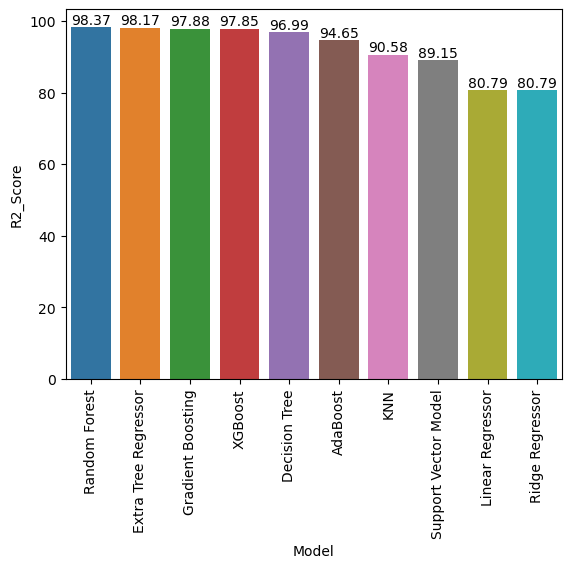

In [46]:
ax = sns.barplot(x='Model',y='R2_Score', data = model_df)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

# Conclusion : Random Forest Model is the best performing model for the given dataset with an R2 score of 98.37% and Mean Squared Error of 16735.80.

# Saving the Random Forest Model for deployment

In [ ]:
pickle.dump(rfpipe,open('model.pkl','wb'))